## K-Means clustering
K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into groups,
or clusters,based on similarity of features.

Use:it can be used to segment a dataset into distinct groups based on similarities among data points. This is valuable in scenarios where you want to identify natural groupings or patterns within your data.


1. Centroid:
A centroid is a representative point for a cluster. In K-means, the algorithm aims to minimize the distance between data points and the centroid of the cluster they belong to.

2. Cluster:
A cluster is a group of data points that share similarity according to a defined metric (usually Euclidean distance in the case of K-means).

3. K:
K is the number of clusters you want to identify in the dataset. It's a user-defined parameter that needs to be specified before running the algorithm.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv('F:\\datasets\\Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
X = dataset.iloc[: , 3: ].values
X


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

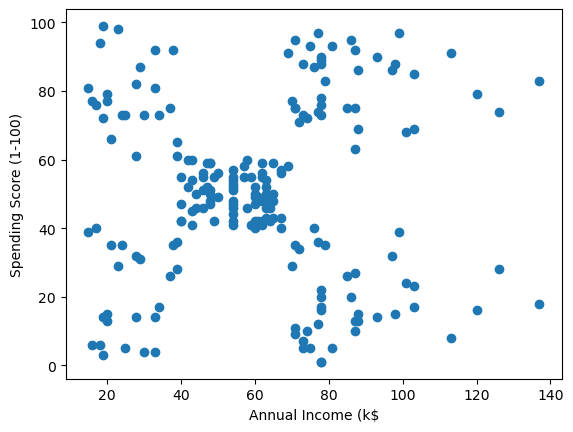

In [6]:
plt.scatter(x="Annual Income (k$)",y="Spending Score (1-100)",data=dataset)
plt.xlabel("Annual Income (k$")
plt.ylabel("Spending Score (1-100)")
plt.show()

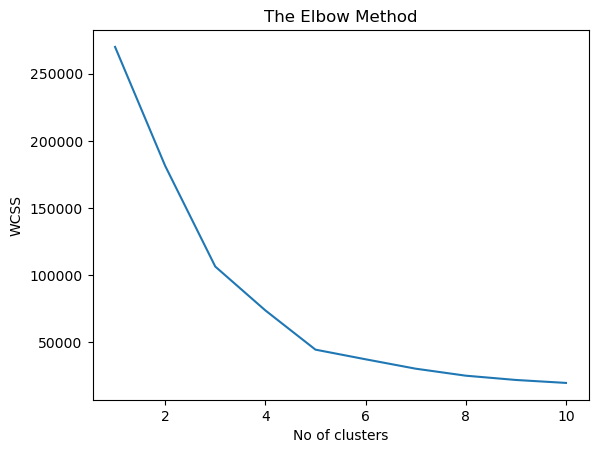

In [7]:
from sklearn.cluster import KMeans
wcss=[]
for  i in range(1 , 11):
  kmeans= KMeans(n_clusters=i, init='k-means++' , random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title("The Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5 , init='k-means++' , random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

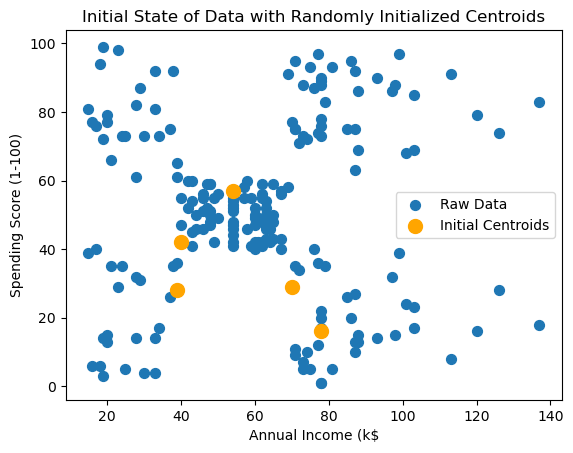

In [40]:
k = 5  # specify the number of clusters
initial_centroids_indices = np.random.choice(len(X), k, replace=False)
initial_centroids = X[initial_centroids_indices]

# Plot the raw data points
plt.scatter(X[:, 0], X[:, 1], s=50, label='Raw Data')


# Plot the initial centroids in a different color
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], s=100, c='orange', marker='o', label='Initial Centroids')
# Set labels and title
plt.title('Initial State of Data with Randomly Initialized Centroids')
plt.xlabel('Annual Income (k$')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Show the plot
plt.show()

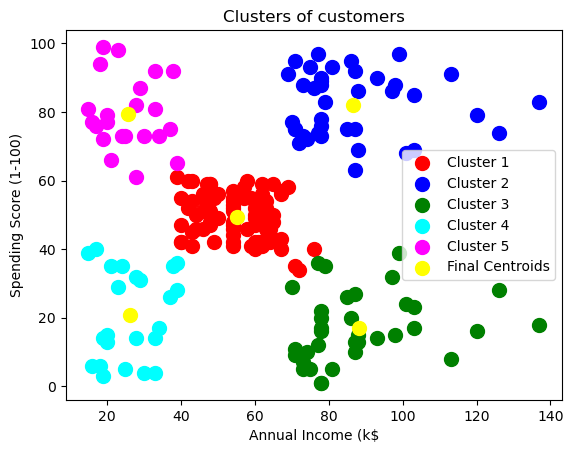

In [41]:
# Plot the clusters and centroids after the clustering process
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', marker='o', label='Final Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Show the final plot
plt.show()

### PCA(Principal Component Analysis )
Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning. 
Its primary goal is to reduce the number of features (or dimensions) in a dataset while retaining as much of the original variability as possible. 

In [117]:
data= pd.read_csv('F:\\datasets\\Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [118]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

### creating the feature matrix

In [119]:
A = data.iloc[: , :-1].values
B = data.iloc[: , -1].values

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train , y_test = train_test_split(A,B , test_size = 0.2 , random_state=0)

In [121]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [130]:
from sklearn.decomposition import PCA
pc=PCA(n_components=2)                  # Create a PCA instance with the desired number of components            
x_train=pc.fit_transform(x_train)
x_test=pc.transform(x_test)           #Fit and transform the data

In [123]:
var=pc.explained_variance_ratio_
var

array([0.36884109, 0.19318394])

In [124]:
from sklearn.linear_model import LogisticRegression
lc=LogisticRegression()
lc.fit(x_train,y_train)

LogisticRegression()

In [125]:
y_pred=lc.predict(x_test)
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [126]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [127]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_prd)
accuracy_score(y_test,y_prd)

0.9722222222222222

<Axes: >

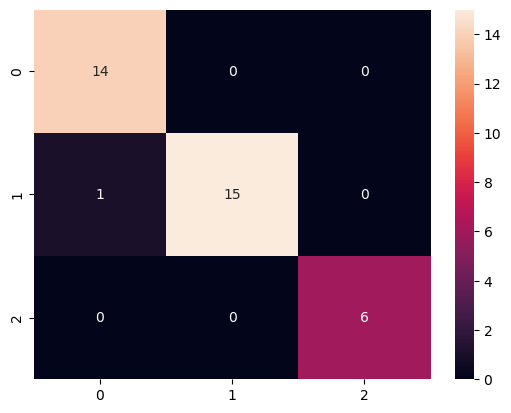

In [128]:
import seaborn as sns
sns.heatmap(cm , annot=True)